## Importando librerías

In [2]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np

## Descarguemos datos

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


### Diccionario de palabras

In [4]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

550378/550378 [==============================] - 0s 0us/step


In [5]:
for _ in train_data[0]:
    print(word_index.get( _ - 3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


### Función de vectorizar 

In [6]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults     

## Transformando los datos

In [7]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [10]:
train_labels[0]

3

In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Creando la red

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

### Entrenando el modelo

In [28]:
history_basic_model = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 28ms/step - loss: 0.3531 - acc: 0.9242 - val_loss: 0.8957 - val_acc: 0.8050
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.3090 - acc: 0.9312 - val_loss: 0.8715 - val_acc: 0.8150
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.2702 - acc: 0.9402 - val_loss: 0.8733 - val_acc: 0.8200
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.2370 - acc: 0.9458 - val_loss: 0.8657 - val_acc: 0.8140
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.2083 - acc: 0.9491 - val_loss: 0.8847 - val_acc: 0.8120
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1935 - acc: 0.9520 - val_loss: 0.8878 - val_acc: 0.8230
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1763 - acc: 0.9518 - val_loss: 0.8992 - val_acc: 0.8160
Epoch 8/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1645 - a

### Validamos resultados

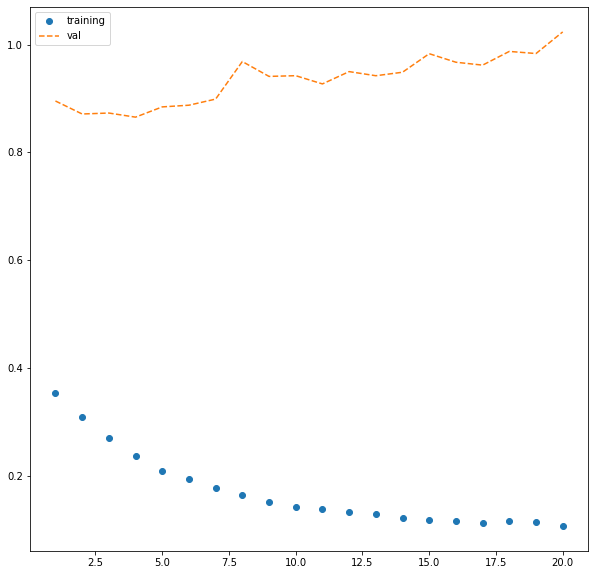

In [29]:
import matplotlib.pyplot as plt 

history_dict = history_basic_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [30]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1354 - acc: 0.7832


[1.1354254484176636, 0.7831701040267944]

In [31]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [32]:
predictions[0]

array([1.8433067e-07, 6.4526091e-08, 1.5513008e-09, 9.7734010e-01,
       2.1236001e-02, 1.0808679e-08, 8.3779561e-09, 6.5813350e-07,
       1.0646838e-03, 1.0271236e-07, 5.6404701e-07, 6.6732337e-06,
       3.2388411e-06, 1.4288943e-08, 9.3701004e-08, 1.6682978e-09,
       1.0356599e-06, 4.1317577e-08, 6.4898074e-09, 5.0356961e-05,
       2.9008457e-04, 5.3708732e-07, 1.1489457e-09, 1.7171164e-06,
       6.7885586e-09, 3.2940051e-08, 5.8443785e-11, 5.3739345e-08,
       1.6954297e-09, 1.9120303e-06, 2.1685084e-07, 2.0473374e-10,
       3.0164178e-09, 5.9950773e-09, 3.9860581e-08, 2.0801825e-07,
       1.2205197e-06, 2.9152487e-09, 1.5056337e-08, 1.0136360e-08,
       5.9191464e-08, 6.2072488e-08, 1.0175955e-08, 3.4535410e-09,
       3.5574690e-10, 1.4259158e-08], dtype=float32)

In [33]:
np.sum(predictions[0])

1.0

In [34]:
np.argmax([2,5,65,3,6,7])

2

In [35]:
np.argmax(predictions[0])

3

# Regularización L2

In [36]:
from keras import regularizers

In [37]:
# 1 definición del modelo
regularizedL2_model = models.Sequential()
regularizedL2_model.add(layers.Dense(64, activation='relu', input_shape=(10000,),
                                   kernel_regularizer=regularizers.l2(0.00002)))
regularizedL2_model.add(layers.Dense(64, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.00002)))
regularizedL2_model.add(layers.Dense(46, activation='softmax'))


# 2 Compilación del modelo
regularizedL2_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 3 Entrenamiento del modelo
history_regularizedL2_model = regularizedL2_model.fit(partial_x_train,
                                                  partial_y_train,
                                                  epochs=20,
                                                  batch_size=512,
                                                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4961 - acc: 0.0019 - val_loss: 0.2555 - val_acc: 0.0030
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1733 - acc: 0.1763 - val_loss: 0.1217 - val_acc: 0.3780
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1054 - acc: 0.3721 - val_loss: 0.0943 - val_acc: 0.3950
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0874 - acc: 0.4211 - val_loss: 0.0819 - val_acc: 0.4990
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0775 - acc: 0.4916 - val_loss: 0.0730 - val_acc: 0.5180
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0698 - acc: 0.5198 - val_loss: 0.0663 - val_acc: 0.5310
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.0640 - acc: 0.5443 - val_loss: 0.0615 - val_acc: 0.5740
Epoch 8/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0597 - a

In [38]:
range(1,len(history_basic_model.history['val_loss'])+1)


range(1, 21)

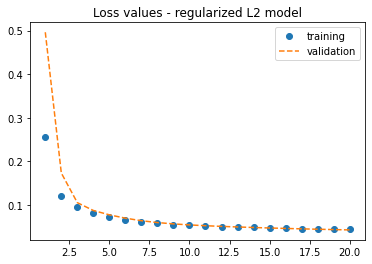

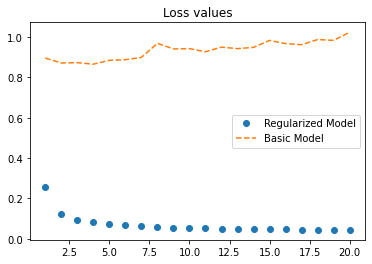

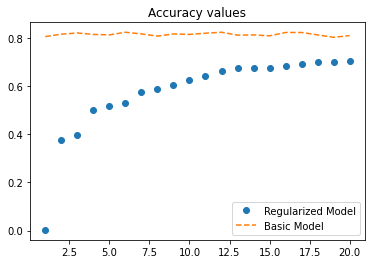

In [39]:
# 4 Validación
epoch = range(1,len(history_basic_model.history['val_loss'])+1)

plt.plot(epoch, history_regularizedL2_model.history['val_loss'], 'o',label='training')
plt.plot(epoch, history_regularizedL2_model.history['loss'], '--',label='validation')
plt.legend()
plt.title('Loss values - regularized L2 model')
plt.show()
print('='*100)

plt.plot(epoch,history_regularizedL2_model.history['val_loss'], 'o',label='Regularized Model')
plt.plot(epoch,history_basic_model.history['val_loss'], '--',label='Basic Model')
plt.legend()
plt.title('Loss values')
plt.show()
print('='*100)

plt.plot(epoch,history_regularizedL2_model.history['val_acc'], 'o',label='Regularized Model')
plt.plot(epoch,history_basic_model.history['val_acc'], '--',label='Basic Model')
plt.legend()
plt.title('Accuracy values')
plt.show() 

# Regularización L1

Epoch 1/20
16/16 [==============================] - 3s 47ms/step - loss: 0.5493 - acc: 0.0422 - val_loss: 0.3101 - val_acc: 0.1120
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 0.2083 - acc: 0.2987 - val_loss: 0.1426 - val_acc: 0.4130
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1227 - acc: 0.3636 - val_loss: 0.1095 - val_acc: 0.3540
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1014 - acc: 0.3802 - val_loss: 0.0958 - val_acc: 0.3900
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0908 - acc: 0.4281 - val_loss: 0.0868 - val_acc: 0.5060
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0834 - acc: 0.4980 - val_loss: 0.0805 - val_acc: 0.4990
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0780 - acc: 0.5396 - val_loss: 0.0758 - val_acc: 0.5560
Epoch 8/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0742 - a

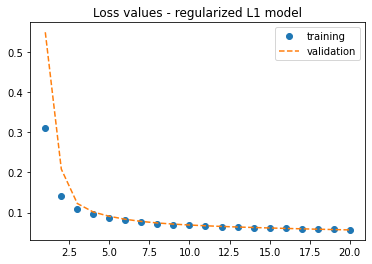

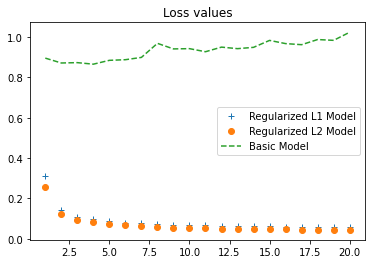

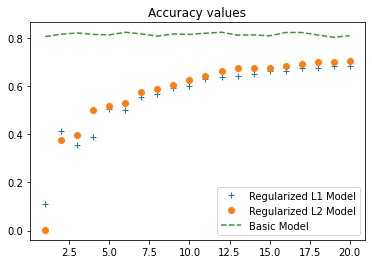

In [40]:
# 1 definición del modelo
regularizedL1_model = models.Sequential()
regularizedL1_model.add(layers.Dense(64, activation='relu', input_shape=(10000,),
                                   kernel_regularizer=regularizers.l1(0.000002)))
regularizedL1_model.add(layers.Dense(64, activation='relu',
                                   kernel_regularizer=regularizers.l1(0.000002)))
regularizedL1_model.add(layers.Dense(46, activation='softmax'))


# 2 Compilación del modelo
regularizedL1_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 3 Entrenamiento del modelo
history_regularizedL1_model = regularizedL1_model.fit(partial_x_train,
                                                  partial_y_train,
                                                  epochs=20,
                                                  batch_size=512,
                                                  validation_data=(x_val, y_val))
# 4 Validación
epoch = range(1,len(history_basic_model.history['val_loss'])+1)

plt.plot(epoch,history_regularizedL1_model.history['val_loss'], 'o',label='training')
plt.plot(epoch,history_regularizedL1_model.history['loss'], '--',label='validation')
plt.legend()
plt.title('Loss values - regularized L1 model')
plt.show()
print('='*100)

plt.plot(epoch,history_regularizedL1_model.history['val_loss'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_loss'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_loss'], '--',label='Basic Model')
plt.legend()
plt.title('Loss values')
plt.show()
print('='*100)

plt.plot(epoch,history_regularizedL1_model.history['val_acc'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_acc'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_acc'], '--',label='Basic Model')
plt.legend()
plt.title('Accuracy values')
plt.show()

# Regularización con Dropout

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 0.4682 - acc: 0.0227 - val_loss: 0.1723 - val_acc: 0.0030
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1545 - acc: 0.1453 - val_loss: 0.0928 - val_acc: 0.3550
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1068 - acc: 0.2626 - val_loss: 0.0783 - val_acc: 0.3540
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0899 - acc: 0.3205 - val_loss: 0.0695 - val_acc: 0.3540
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0793 - acc: 0.3706 - val_loss: 0.0635 - val_acc: 0.3650
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0725 - acc: 0.4156 - val_loss: 0.0591 - val_acc: 0.5000
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0671 - acc: 0.4595 - val_loss: 0.0557 - val_acc: 0.5330
Epoch 8/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0634 - a

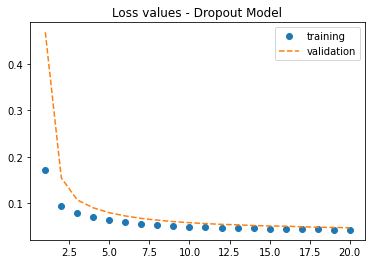

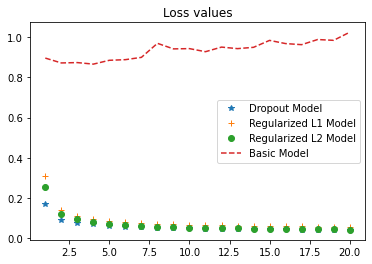

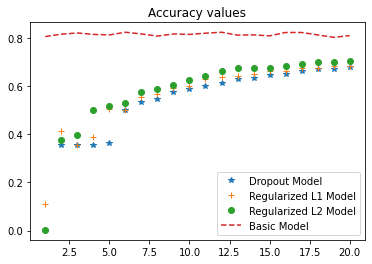

In [41]:
# 1 definición del modelo
reg_dropout_model = models.Sequential()
reg_dropout_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(64, activation='relu'))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(64, activation='relu'))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(46, activation='softmax'))


# 2 Compilación del modelo
reg_dropout_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 3 Entrenamiento del modelo
history_reg_dropout_model = reg_dropout_model.fit(partial_x_train,
                                                  partial_y_train,
                                                  epochs=20,
                                                  batch_size=512,
                                                  validation_data=(x_val, y_val))
# 4 Validación
epoch = range(1,len(history_basic_model.history['val_loss'])+1)

plt.plot(epoch,history_reg_dropout_model.history['val_loss'], 'o',label='training')
plt.plot(epoch,history_reg_dropout_model.history['loss'], '--',label='validation')
plt.legend()
plt.title('Loss values - Dropout Model')
plt.show()
print('='*100)

plt.plot(epoch,history_reg_dropout_model.history['val_loss'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_loss'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_loss'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_loss'], '--',label='Basic Model')
plt.legend()
plt.title('Loss values')
plt.show()
print('='*100)

plt.plot(epoch,history_reg_dropout_model.history['val_acc'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_acc'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_acc'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_acc'], '--',label='Basic Model')
plt.legend()
plt.title('Accuracy values')
plt.show()

Regularización con L1-L2

In [42]:
# 1 definición del modelo
reg_L1L2_model = models.Sequential()
reg_L1L2_model.add(layers.Dense(64, activation='relu', input_shape=(10000,),
                                   kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.00001)))

# reg_L1L2_model.add(layers.Dense(64, activation='relu',
#                                    kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.00001)))

# reg_L1L2_model.add(layers.Dense(64, activation='relu',
#                                    kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.00001)))

reg_L1L2_model.add(layers.Dense(46, activation='softmax'))


# 2 Compilación del modelo
reg_L1L2_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 3 Entrenamiento del modelo
history_reg_L1L2_model = reg_L1L2_model.fit(partial_x_train,
                                                  partial_y_train,
                                                  epochs=20,
                                                  batch_size=512,
                                                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 0.5224 - acc: 0.1694 - val_loss: 0.3345 - val_acc: 0.2040
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 0.2485 - acc: 0.2240 - val_loss: 0.1786 - val_acc: 0.5010
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1479 - acc: 0.5160 - val_loss: 0.1240 - val_acc: 0.5170
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.1102 - acc: 0.5169 - val_loss: 0.1002 - val_acc: 0.5130
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0927 - acc: 0.5292 - val_loss: 0.0877 - val_acc: 0.5320
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0827 - acc: 0.5525 - val_loss: 0.0797 - val_acc: 0.5670
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0760 - acc: 0.5824 - val_loss: 0.0741 - val_acc: 0.5850
Epoch 8/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0713 - a

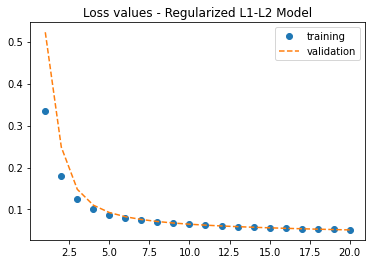

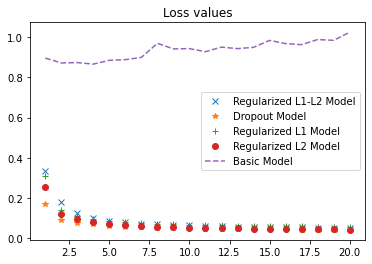

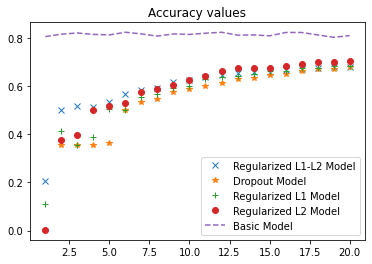

In [44]:
# 4 Validación
epoch = range(1,len(history_basic_model.history['val_loss'])+1)

plt.plot(epoch,history_reg_L1L2_model.history['val_loss'], 'o',label='training')
plt.plot(epoch,history_reg_L1L2_model.history['loss'], '--',label='validation')
plt.legend()
plt.title('Loss values - Regularized L1-L2 Model')
plt.show()
print('='*100)

plt.plot(epoch,history_reg_L1L2_model.history['val_loss'], 'x',label='Regularized L1-L2 Model')
plt.plot(epoch,history_reg_dropout_model.history['val_loss'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_loss'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_loss'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_loss'], '--',label='Basic Model')
plt.legend()
plt.title('Loss values')
plt.show()
print('='*100)
plt.plot(epoch,history_reg_L1L2_model.history['val_acc'], 'x',label='Regularized L1-L2 Model')
plt.plot(epoch,history_reg_dropout_model.history['val_acc'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_acc'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_acc'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_acc'], '--',label='Basic Model')
plt.legend()
plt.title('Accuracy values')
plt.show()